In [15]:
import io
import cv2
import time
import keyboard
import numpy as np
from io import BytesIO
import concurrent.futures  
from selenium import webdriver
from PIL import Image, ImageDraw
# from utils import update_coords,get_cv2_format
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import StaleElementReferenceException

In [4]:
driver = webdriver.Firefox(executable_path=r'D:\Installers\geckodriver.exe')
driver.get('https://chromedino.com/')

In [16]:
canvas = driver.find_element_by_css_selector('.runner-canvas')
outer_body = driver.find_element_by_id('aswift_0_expand')
main_body = driver.find_element_by_xpath("//html")
act = ActionChains(driver)

In [34]:
def jump():
#     start()
    keyboard.press(keyboard.KEY_UP)
#     act.send_keys(Keys.SPACE).perform()
    
def pause():
    outer_body.click()
    
def duck():
    down()
    time.sleep(1)
    up()
    
def up():
    act.key_up(Keys.DOWN).perform()
    
def down():
    act.key_down(Keys.DOWN).perform()
    
def start():
    try:
        canvas.click()
    except:
        main_body.send_keys(Keys.SPACE)
        
def get_image():
    screenshot = canvas.screenshot_as_png
    bytes_ = BytesIO(screenshot)
    return Image.open(bytes_).convert('RGB')
        
def get_readings(coords):
    start()
    readings = []
    start_time = time.time()
    while time.time() - start_time < 3:
        img = get_image()
        crops = [np.array(img.crop(coord)) for coord in coords]
        readings.append([np.sum(np.array(cropped)) for cropped in crops])
    return np.array([int(np.mean(np.array(readings)[:,i])) for i in range(np.shape(readings)[-1])]),start_time

def update_coords(coords,x_offset):
    for i,coord in enumerate(coords):
        coord = list(coord)
        coord[0] += x_offset
        coord[2] += x_offset
        coord = tuple(list(map(int,coord)))
        coords[i] = coord
    return coords

def get_cv2_format(coords):
    temp = []
    for i in range(len(coords)):
        temp.append([coords[i][0:2],coords[i][2:]])  
    return temp

# main box
x1,y1 = 49+30, 107
x2,y2 = 104+30,150
mainbox = (x1,y1,x2,y2)


# bird box upper (1)
x1_bb1,y1_bb1 = x1,94
x2_bb1,y2_bb1 = x2,132
bb1 = (x1_bb1,y1_bb1,x2_bb1,y2_bb1)


# bird box lower (2)
x1_bb2,y1_bb2 = x1,133
x2_bb2,y2_bb2 = x2,y2
bb2 = (x1_bb2,y1_bb2,x2_bb2,y2_bb2)


# refresh button
x1_r,y1_r = 357,97
x2_r,y2_r = 395,130
refbox = (x1_r,y1_r,x2_r,y2_r)


offset_readings = -30000
x_offset = 0

colors = [(255,0,0),
         (0,255,0),
         (0,0,255)]


coords = [mainbox,bb1,bb2,refbox]

readings,start_time = get_readings(coords)
thresholds = readings + offset_readings

while True:
    time_passed = time.time()  
    if int(time_passed - start_time)%2 == 0:
        x_offset+=0.001
        
    coords = update_coords(coords,x_offset)
    
    img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
    
    main_box = np.sum(np.array(img.crop(coords[0])))
    refbox   = np.sum(np.array(img.crop(coords[1])))
    bb1_     = np.sum(np.array(img.crop(coords[2])))
    bb2_     = np.sum(np.array(img.crop(coords[3])))
    
    
    if main_box < thresholds[0]:
        print('jump')
#         jump()
        act.send_keys(Keys.SPACE).perform()
    
    elif refbox == 431949:
        pause()
        
#     elif bb1_ < thresholds[1] and not bb2_ < readings[2]:
#         print('duck!')
#         duck()
        
    if keyboard.is_pressed('alt'):
        pause()
        cv2.destroyAllWindows()        
        break
        
    if keyboard.is_pressed('p'):
        pause()
        cv2.imwrite('test.png',img)
        
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    img = cv2.bitwise_not(img)
    img[img==8]=0
    cv2_coords = get_cv2_format(coords)


    pt1,pt2 = cv2_coords[0]
    cv2.rectangle(img,pt1,pt2,(255,0,0),2)
    
    pt1,pt2 = cv2_coords[1]
    cv2.rectangle(img,pt1,pt2,(0,255,0),2)
    
    pt1,pt2 = cv2_coords[2]
    cv2.rectangle(img,pt1,pt2,(0,0,0),2)
        
    cv2.imshow('Dino', img)
    cv2.waitKey(1)  

jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump
jump


In [48]:
from selenium import webdriver

options = Options()
options.headless = True
driver = webdriver.Firefox(options=options, executable_path=r'D:\Installers\geckodriver.exe')
driver.get("http://google.com/")
print ("Headless Firefox Initialized")
driver.quit()

Headless Firefox Initialized


In [18]:
import io
import cv2
import time
import keyboard
import threading
import numpy as np
from io import BytesIO
from selenium import webdriver
from PIL import Image, ImageDraw
from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.firefox.options import Options

# refresh button
x1_r,y1_r = 357,97
x2_r,y2_r = 395,130
ref_box = (x1_r,y1_r,x2_r,y2_r)

def showInMovedWindow(winname, img, x, y):
    cv2.imshow(winname,img)


def start():
    try:
        canvas.click()
    except:
        main_body.send_keys(Keys.SPACE)

def get_image():
    img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
    img_array = np.array(img)
    return img,img_array

def duck():
    keyboard.press(keyboard.KEY_DOWN)
    time.sleep(0.3)
    keyboard.release(keyboard.KEY_DOWN)


if __name__=='__main__':
    
    try:
        driver.find_element_by_css_selector('.runner-canvas') #check if driver can get element
    except: # if error comes then get new driver and load page
        options = Options()
        options.headless = False
        driver = webdriver.Firefox(options=options, executable_path=r'D:\Installers\geckodriver.exe')

        driver.get('https://chromedino.com/')
        canvas = driver.find_element_by_css_selector('.runner-canvas')
        outer_body = driver.find_element_by_id('aswift_0_expand')
        main_body = driver.find_element_by_xpath("//html")
        print('page ready')
        
        
    left_bound = np.array([117, 110])
    right_bound = np.array([161, 202])

    start_time = time.time()
    flag = 0
    factor = 1
    
    cv2.namedWindow('dino game')        
    cv2.moveWindow('dino game', 20, 20)   

    start()
    
    while True:
        current_time = time.time()

        img,img_array = get_image()
        refbox   = np.sum(np.array(img.crop(ref_box)))
        crop_image = img_array[left_bound[0]:right_bound[0], left_bound[1]:right_bound[1], :]

        img_array = cv2.rectangle(img_array, (left_bound[1], left_bound[0]), (right_bound[1], right_bound[0]), (0,0,0), 1)

        bott_image = crop_image[int(crop_image.shape[0]/2):, :, :]
        top_image = crop_image[:int(crop_image.shape[0]/2), :, :]

        cv2.imshow('dino game', img_array)
        cv2.waitKey(1)

        top_avg = np.average(top_image)
        bott_avg = np.average(bott_image)

        if(flag==1):
            start_time = time.time()

        if(int(current_time-start_time)>30):
            left_bound[1] = left_bound[1] + int(factor*10)
            right_bound[1] = right_bound[1] + int(factor*10)
            start_time = time.time()
            factor = factor + 0.3
            
        if refbox in range(431691,431950) :
            print('refbox')
            start_time = time.time()
            flag = 0
            factor = 1
            start()

        if(top_avg>227 and bott_avg<235):#high jump
            print('high')
            driver.find_element_by_xpath("//html").send_keys(Keys.ARROW_UP)
            flag = 0

        elif(bott_avg<235):#low jump
            print('low')
            canvas.click()

            keyboard.press(keyboard.KEY_UP)
            flag = 0
            
        elif(top_avg<227 and bott_avg>237): #duck
            t = threading.Thread(target=duck)
            t.start()

        if keyboard.is_pressed('alt'):
            cv2.destroyAllWindows()
            driver.close()
            break

page ready
high
high
high
high
high
high
high
high
high
high
low
high
low
refbox
low
refbox
low
refbox
high
high
high
high
high
high
high
high
high
high
high
refbox
low
refbox
high
high
high
high
high
high
high
high
high
high
high
high
refbox
low
high
high
high
high
high
high
high
high
low
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
high
low
low
refbox
high
high
high
high
high
high
high
high
high
high
high
high
refbox
low
high
high
high
high
high
high
high
high
high
high
refbox
high
high
low
high
high
high
high
high
low
high
low
high
high
low
refbox
high


In [8]:
cv2.destroyAllWindows()

In [ ]:
#     for i in range(len(coords)-1):
#         pt1,pt2 = cv2_coords[i]
#         cv2.rectangle(img, pt1, pt2, colors[i], 2)

In [ ]:
#     img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
#     img = cv2.bitwise_not(img)
#     img[img==8]=0

In [420]:
start()
start_time = time.time()
readings = []

x_offset = 0

starttime = time.time()

img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
cropped = np.array(img.crop( ( x_n, y_n, x_,y_ ) ) )

while time.time() - start_time < 3:
    readings.append(np.sum(np.array(cropped)))

threshold = int(np.mean(readings)) - offset
print('threshold',threshold)
    
while True:
    time_passed = time.time()  
    if int(time_passed - starttime)%2 == 0:
        print(x_offset)
        x_offset+=0.01
    
    img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
    cropped = np.array(img.crop( ( x_n+int(x_offset), y_n, x_+int(x_offset) ,y_) ) )
    restart_button = img.crop(( x_ref_top_left, y_ref_top_left, x_ref_bottom_rigth,
                               y_ref_bottom_rigth ))
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    img[img==8]=0
    
    cv2.rectangle(img, (x_n+int(x_offset), y_n), (x_+int(x_offset),y_) , (255), 2)
    cv2.imshow('Test2', img)
    cv2.waitKey(1)    
    
    roi = img[y1:y2, x1:x2]
    
    if np.sum(cropped) < threshold:
        main_body.send_keys(Keys.SPACE)
#         print('jump')

    if np.sum(restart_button) == 431949:
#         print('restart')
        pause()
        
#     elif np.sum(restart_button) < 900000:
#         print(np.sum(restart_button))
#         print('duck!')
#         duck()
        
    if keyboard.is_pressed('alt'):
        pause()
        cv2.destroyAllWindows()        
        break
        
    if keyboard.is_pressed('p'):
        pause()
        cv2.imwrite('test.png',img)


threshold 1696250
0
0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900

4.559999999999947
4.569999999999947
4.579999999999947
4.589999999999947
4.599999999999946
4.609999999999946
4.619999999999946
4.629999999999946
4.6399999999999455
4.649999999999945
4.659999999999945
4.669999999999945
4.679999999999945
4.689999999999944
4.699999999999944
4.709999999999944
4.719999999999944
4.729999999999944
4.739999999999943
4.749999999999943
4.759999999999943
4.769999999999943
4.7799999999999425
4.789999999999942
4.799999999999942
4.809999999999942
4.819999999999942
4.8299999999999415
4.839999999999941
4.849999999999941
4.859999999999941
4.869999999999941
4.87999999999994
4.88999999999994
4.89999999999994
4.90999999999994
4.9199999999999395
4.929999999999939
4.939999999999939
4.949999999999939
4.959999999999939
4.9699999999999385
4.979999999999938
4.989999999999938
4.999999999999938
5.009999999999938
5.019999999999937


In [48]:
np.sum(crops[0])

1460736

In [56]:
np.shape(readings)

(271, 4)

In [ ]:
out.append([int(np.mean(reading)) for reading in readings])

[1460736, 929214, 1400256, 560724]

In [16]:
pause(outer_body)

In [17]:
start(canvas,main_body)

In [23]:
list(product(names, repeat=2))

[('Brown', 'Brown'),
 ('Brown', 'Wilson'),
 ('Brown', 'Bartlett'),
 ('Brown', 'Rivera'),
 ('Brown', 'Molloy'),
 ('Brown', 'Opie'),
 ('Wilson', 'Brown'),
 ('Wilson', 'Wilson'),
 ('Wilson', 'Bartlett'),
 ('Wilson', 'Rivera'),
 ('Wilson', 'Molloy'),
 ('Wilson', 'Opie'),
 ('Bartlett', 'Brown'),
 ('Bartlett', 'Wilson'),
 ('Bartlett', 'Bartlett'),
 ('Bartlett', 'Rivera'),
 ('Bartlett', 'Molloy'),
 ('Bartlett', 'Opie'),
 ('Rivera', 'Brown'),
 ('Rivera', 'Wilson'),
 ('Rivera', 'Bartlett'),
 ('Rivera', 'Rivera'),
 ('Rivera', 'Molloy'),
 ('Rivera', 'Opie'),
 ('Molloy', 'Brown'),
 ('Molloy', 'Wilson'),
 ('Molloy', 'Bartlett'),
 ('Molloy', 'Rivera'),
 ('Molloy', 'Molloy'),
 ('Molloy', 'Opie'),
 ('Opie', 'Brown'),
 ('Opie', 'Wilson'),
 ('Opie', 'Bartlett'),
 ('Opie', 'Rivera'),
 ('Opie', 'Molloy'),
 ('Opie', 'Opie')]

In [2]:
import multiprocessing
from itertools import product
from merge_names import merge_names


if __name__ == '__main__':
    names = ['Brown', 'Wilson', 'Bartlett', 'Rivera', 'Molloy', 'Opie']
    with multiprocessing.Pool(processes=3) as pool:
        results = pool.starmap(merge_names, product(names, repeat=2))
    print(results)

['Brown & Brown', 'Brown & Wilson', 'Brown & Bartlett', 'Brown & Rivera', 'Brown & Molloy', 'Brown & Opie', 'Wilson & Brown', 'Wilson & Wilson', 'Wilson & Bartlett', 'Wilson & Rivera', 'Wilson & Molloy', 'Wilson & Opie', 'Bartlett & Brown', 'Bartlett & Wilson', 'Bartlett & Bartlett', 'Bartlett & Rivera', 'Bartlett & Molloy', 'Bartlett & Opie', 'Rivera & Brown', 'Rivera & Wilson', 'Rivera & Bartlett', 'Rivera & Rivera', 'Rivera & Molloy', 'Rivera & Opie', 'Molloy & Brown', 'Molloy & Wilson', 'Molloy & Bartlett', 'Molloy & Rivera', 'Molloy & Molloy', 'Molloy & Opie', 'Opie & Brown', 'Opie & Wilson', 'Opie & Bartlett', 'Opie & Rivera', 'Opie & Molloy', 'Opie & Opie']


In [28]:
coords = [mainbox,refbox,bb1,bb2]


In [31]:
[(x) for x in coords]

[(49, 107, 104, 150),
 (357, 97, 395, 130),
 (49, 94, 104, 132),
 (49, 133, 104, 150)]

In [2]:
from wait import sleep

In [10]:
[(x,x) for x in secs]

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]

In [12]:
from wait import sleep
import multiprocessing
from selenium import webdriver

driver = webdriver.Firefox()
driver.get('https://www.google.com')

secs = [1,2,3,4,5]

if __name__ == "__main__":
    with multiprocessing.Pool(processes=4) as pool:
        results = pool.starmap(sleep,[(driver,x) for x in secs])
    print(results)

TypeError: cannot serialize '_io.TextIOWrapper' object

In [5]:
from multiprocessing import Pool
import wait

if __name__ == '__main__':
    p = Pool(processes=2)
    data = p.map(wait.wait, [2,1])
    p.close()
    print(data)

['Done 2', 'Done 1']


In [4]:
# from multiprocessing import Pool
# import workers

# if __name__ ==  '__main__': 
#     num_processors = 3
#     p=Pool(processes = num_processors)
#     output = p.map(workers.worker,[i for i in range(0,3)])
#     print(output)

# from multiprocessing import Pool
# import job

# if __name__ == '__main__':
#     p = Pool(processes=2)
#     data = p.map(job.job, [i for i in range(2)])
#     p.close()
#     print(data)

# import multiprocessing
# import time
# start = time.perf_counter()
# def do_something():
#     print('Sleeping for 1 second')
#     time.sleep(1)
#     print('Done sleeping...')
# if __name__ == '__main__':
#     p1 = multiprocessing.Process(target=do_something)
#     p2 = multiprocessing.Process(target=do_something)
#     p1.start()
#     p2.start()
#     p1.join()
#     p2.join()

#     finish = time.perf_counter()
#     print(f'Finished in {round(finish-start,4)} seconds')

# import concurrent.futures
# import wait

# if __name__ == "__main__":
#     with concurrent.futures.ProcessPoolExecutor() as executor:
#         p = executor.submit(wait.wait,1)
#         print(p.result())

In [164]:
# cv2.imread(img)

In [68]:
# driver.find_element_by_id('').send_keys(Keys.SPACE)


In [9]:
# img = canvas.screenshot_as_png
# img = Image.open(BytesIO(img))
# img.save('test.png')
# img

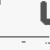

In [153]:
cropped = img.crop( ( x, y, x + width , y + height ) )
cropped

In [166]:
np.sum(np.full(np.shape(cropped), 255))

2550000

In [155]:
np.sum(np.array(cropped))

2377494

In [168]:
2550000 - 2377494

172506

In [170]:
import time

In [173]:
start = time.time()

In [174]:
start

1592574291.6045952

In [187]:
incr = 1
x = 78
y = 128
width = 50
height = 50

In [188]:
print(x,y)

78 128


In [191]:
start = time.time()

In [193]:
time.time() - start

11.906365156173706

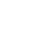

In [226]:
img = canvas.screenshot_as_png

img = canvas.screenshot_as_png

img = Image.open(BytesIO(img))

cropped = img.crop( ( x, y, x + width , y + height ) ) 
cropped

In [290]:
np.array(img).shape[0] - 78

109

In [285]:
img = canvas.screenshot_as_png
img = Image.open(BytesIO(img))
cropped = img.crop( ( 78,128,100 , 100) )
cropped

SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGBA size=22x0 at 0x27B68178C48>

In [314]:
2550000 - 670000

1880000

In [333]:
img = canvas.screenshot_as_png
img = Image.open(BytesIO(img))

img.save('test.png')

In [460]:
driver.find_element_by_id('aswift_0_expand').click()

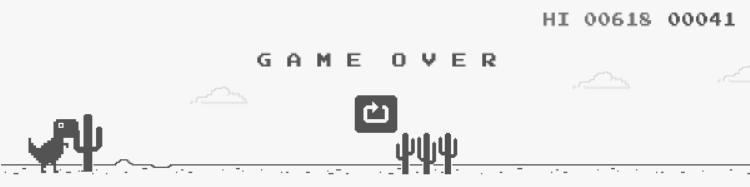

In [334]:
img

In [330]:
352-397

-45

In [348]:
restart_button = img.crop(( 353, 96, 397 , 132))
np.sum(restart_button)

953865

In [383]:
img = canvas.screenshot_as_png
img = Image.open(BytesIO(img))
cropped = img.crop( ( x_top_left, y_top_left, x_bottom_rigth , y_bottom_rigth ) ) 
np.sum(cropped)

1421811

In [378]:
val = [] 
while True:
    img = canvas.screenshot_as_png
    img = Image.open(BytesIO(img))
    cropped = img.crop( ( x_top_left, y_top_left, x_bottom_rigth , y_bottom_rigth ) ) 
    val.append(np.sum(cropped))
    print(Counter(val).keys()) 
    print(Counter(val).values() )

dict_keys([1744050])
dict_values([1])
dict_keys([1744050])
dict_values([2])
dict_keys([1744050])
dict_values([3])
dict_keys([1744050])
dict_values([4])
dict_keys([1744050])
dict_values([5])
dict_keys([1744050])
dict_values([6])
dict_keys([1744050])
dict_values([7])
dict_keys([1744050])
dict_values([8])
dict_keys([1744050])
dict_values([9])
dict_keys([1744050])
dict_values([10])
dict_keys([1744050])
dict_values([11])
dict_keys([1744050])
dict_values([12])
dict_keys([1744050])
dict_values([13])
dict_keys([1744050])
dict_values([14])
dict_keys([1744050])
dict_values([15])
dict_keys([1744050])
dict_values([16])
dict_keys([1744050])
dict_values([17])
dict_keys([1744050])
dict_values([18])
dict_keys([1744050])
dict_values([19])
dict_keys([1744050])
dict_values([20])
dict_keys([1744050])
dict_values([21])
dict_keys([1744050])
dict_values([22])
dict_keys([1744050])
dict_values([23])
dict_keys([1744050])
dict_values([24])
dict_keys([1744050])
dict_values([25])
dict_keys([1744050])
dict_values([

dict_keys([1744050])
dict_values([209])
dict_keys([1744050])
dict_values([210])
dict_keys([1744050])
dict_values([211])
dict_keys([1744050])
dict_values([212])
dict_keys([1744050])
dict_values([213])
dict_keys([1744050])
dict_values([214])
dict_keys([1744050])
dict_values([215])
dict_keys([1744050])
dict_values([216])
dict_keys([1744050])
dict_values([217])
dict_keys([1744050])
dict_values([218])
dict_keys([1744050])
dict_values([219])
dict_keys([1744050])
dict_values([220])
dict_keys([1744050])
dict_values([221])
dict_keys([1744050])
dict_values([222])
dict_keys([1744050])
dict_values([223])
dict_keys([1744050])
dict_values([224])
dict_keys([1744050])
dict_values([225])
dict_keys([1744050])
dict_values([226])
dict_keys([1744050])
dict_values([227])
dict_keys([1744050])
dict_values([228])
dict_keys([1744050])
dict_values([229])
dict_keys([1744050])
dict_values([230])
dict_keys([1744050])
dict_values([231])
dict_keys([1744050])
dict_values([232])
dict_keys([1744050])
dict_values([233])


dict_keys([1744050])
dict_values([426])
dict_keys([1744050])
dict_values([427])
dict_keys([1744050])
dict_values([428])
dict_keys([1744050])
dict_values([429])
dict_keys([1744050])
dict_values([430])
dict_keys([1744050])
dict_values([431])
dict_keys([1744050])
dict_values([432])
dict_keys([1744050])
dict_values([433])
dict_keys([1744050])
dict_values([434])
dict_keys([1744050])
dict_values([435])
dict_keys([1744050])
dict_values([436])
dict_keys([1744050])
dict_values([437])
dict_keys([1744050])
dict_values([438])
dict_keys([1744050])
dict_values([439])
dict_keys([1744050])
dict_values([440])
dict_keys([1744050])
dict_values([441])
dict_keys([1744050])
dict_values([442])
dict_keys([1744050])
dict_values([443])
dict_keys([1744050])
dict_values([444])
dict_keys([1744050])
dict_values([445])
dict_keys([1744050])
dict_values([446])
dict_keys([1744050])
dict_values([447])
dict_keys([1744050])
dict_values([448])
dict_keys([1744050])
dict_values([449])
dict_keys([1744050])
dict_values([450])


dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 93, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 94, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 95, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 96, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 97, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 98, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 99, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 177

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 160, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 161, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 162, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 163, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 164, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 165, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 166, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 17864

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 221, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 222, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 223, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 224, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 225, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 226, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 227, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 17864

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 295, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 296, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 297, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 298, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 299, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 300, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018])
dict_values([506, 301, 1, 1, 1, 1, 2, 1, 1])
dict_keys([1744050, 1791615, 17864

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 33])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 34])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 35])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 36])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 82])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 83])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 84])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 85])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 130])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 131])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 132])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 133])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 163

dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 169])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 170])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 171])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 1634229, 1588587, 1486950, 1421811, 1359885, 1416300])
dict_values([506, 313, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 172])
dict_keys([1744050, 1791615, 1786437, 1779183, 1776504, 1776564, 1776543, 1783617, 1791018, 1729407, 163

KeyboardInterrupt: 

In [377]:
from collections import Counter
print(Counter(val).keys())
print(Counter(val).values() )

dict_keys([1791615, 1784502, 1777155, 1776564, 1776543, 1779039, 1786110, 1772784, 1678437, 1553559, 1482555, 1483743, 1480695, 1533858])
dict_values([265, 1, 1, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 22])


In [375]:
np.sort(val)

array([1480695, 1480695, 1482555, 1482555, 1483743, 1483743, 1533858,
       1533858, 1533858, 1533858, 1533858, 1533858, 1533858, 1533858,
       1533858, 1533858, 1533858, 1533858, 1533858, 1533858, 1533858,
       1533858, 1533858, 1533858, 1533858, 1533858, 1533858, 1533858,
       1553559, 1553559, 1678437, 1678437, 1772784, 1772784, 1776543,
       1776543, 1776543, 1776543, 1776564, 1776564, 1777155, 1779039,
       1779039, 1784502, 1786110, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791615, 1791615, 1791615, 1791615, 1791615, 1791615,
       1791615, 1791

In [415]:
989721 < 1000000

True

In [547]:
canvas.click()

In [578]:
np.shape(cropped)[0:-1]

(36, 1)

In [580]:
ar = np.full(np.shape(cropped)[0],247)

In [585]:
cropped == ar

False

In [589]:
ar = np.squeeze(cropped)[:,0].copy()

In [592]:
np.array_equal(ar,arr)

True

In [574]:
np.array(cropped)

array([[[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [[247, 247, 247, 255]],

       [

In [197]:
start()
jump()

In [195]:
# driver.find_element_by_xpath('/html/body/div[3]/svg').click()

In [579]:
np.shape(np.squeeze(cropped)[:,0])

(36,)

In [596]:
value = 100

In [611]:
array[:,:,0]

array([[247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       ...,
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247]], dtype=uint8)

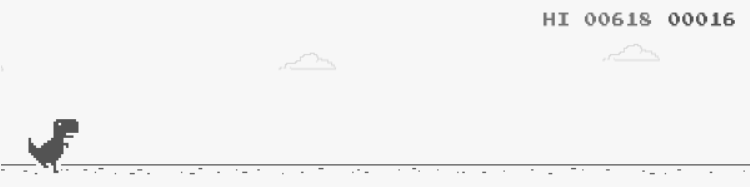

In [598]:
img

In [602]:
array = np.array(img)

In [604]:
np.shape(array)

(187, 750, 4)

In [606]:
np.shape(array[0])

(750, 4)

In [599]:
array = np.squeeze(img)[:,0]

In [193]:
# array

In [23]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
pause()

In [13]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
np.shape(img)

(187, 750)

In [ ]:
arr = np.squeeze(cropped)[:,0]


In [ ]:
roi = im[y1:y2, x1:x2]

In [81]:
# duck()

In [137]:
# img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')

# img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)

# img = cv2.bitwise_not(img)

# cv2.rectangle(img, (x_n, y_n), (y_, x_) , (255), 2)

# cv2.imshow('Test2', img)
# if cv2.waitKey() == ord('q'):
#     cv2.destroyAllWindows()

In [138]:
# np.shape(cropped)

In [139]:
# img.show()

In [128]:
# #dino's nose:
# x_n = 54
# y_n = 120

# width = 55
# height = 43

# y_ = y_n + height
# x_ = x_n + width
# print(x_n,y_n,x_,y_)

54 120 109 163


In [123]:
109-54

55

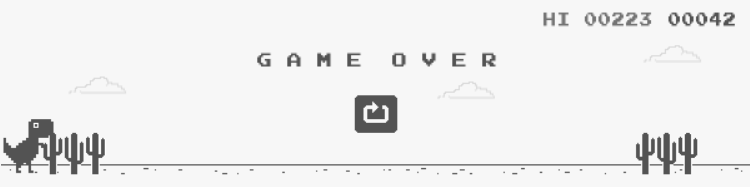

In [127]:
img

In [131]:
img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
cropped = img.crop( ( x_n, y_n,x_,y_ ) ) 
cropped.show()
# img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
# img = cv2.bitwise_not(img)
# img[img==8]=0
# cv2.rectangle(img, (x_n, y_n), (y_, x_) , (255), 2)
# cv2.imshow('Test2', img)
# if cv2.waitKey() == ord('q'):
#     cv2.destroyAllWindows()

In [ ]:
    
def start():
    try:
        canvas.click()
    except:
        driver.find_element_by_id('t').send_keys(Keys.SPACE)

In [263]:
np.sum(restart_button)

576597

In [264]:
np.shape(restart_button)

(36, 45, 3)

In [269]:
cv2.imwrite('TEST.png',img)

True

In [345]:
img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')

cropped = np.array(img.crop( ( x_n, y_n, x_ ,y_) ) )

restart_button = img.crop(( x_ref_top_left, y_ref_top_left, x_ref_bottom_rigth,
                               y_ref_bottom_rigth ))


In [346]:
img.save('test.png')

In [292]:
np.sum(restart_button)

431949

In [297]:
np.sum(restart_button)

929214

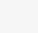

In [295]:
restart_button

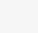

In [296]:
restart_button

In [419]:
img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
img1 = img
img1 = cv2.cvtColor(np.array(img1), cv2.COLOR_BGR2RGB)

cropped = np.array(img.crop( ( x_n, y_n, x_ ,y_) ) )
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
img[img==8]=0

cv2.rectangle(img1, (x_n, y_n), (x_,y_) , (0,255,0), 3)
cv2.rectangle(img1, (bird_box_2_x1,bird_box_2_y1 ), (bird_box_2_x2,bird_box_2_y2) , (255,0,0), 1)
cv2.rectangle(img1, (bird_box_1_x1,bird_box_1_y1 ), (bird_box_1_x2,bird_box_1_y2) , (0,0,255), 1)
cv2.imshow('Test2', img1)

if cv2.waitKey() == ord('q'):
    cv2.destroyAllWindows()

In [353]:
cv2.destroyAllWindows()

In [ ]:
# x1 = 116
# y1 = 119
# x2 = 117
# y2 = 175

# val = 18
# val_y = -15


# #dino's nose:
# x_n = 54-5
# y_n = 122 - 15

# width = 55
# height = 43

# y_ = y_n + height
# x_ = x_n + width


# x_top_left = x1-40 + val 
# y_top_left  = y1+val_y
# x_bottom_rigth = x2 + val
# y_bottom_rigth = y2+val_y

# x_ref_top_left = 357
# y_ref_top_left = 97
# x_ref_bottom_rigth = 395
# y_ref_bottom_rigth = 130

# bird_box_1_x1= x_n
# bird_box_1_y1= 104 - 10

# bird_box_1_x2= x_
# bird_box_1_y2= 142-10

# bird_box_2_x1= bird_box_1_x1
# bird_box_2_y1= bird_box_1_y2+1

# bird_box_2_x2= x_
# bird_box_2_y2= y_

# print('x_n',x_n)
# print('y_n',y_n)
# print('width',width)
# print('height',height)
# print('y_',y_)
# print('x_',x_)
# print('x_top_left',x_top_left)
# print('y_top_left',y_top_left)
# print('x_bottom_rigth',x_bottom_rigth)
# print('y_bottom_rigth',y_bottom_rigth)
# print('x_ref_top_left',x_ref_top_left)
# print('y_ref_top_left',y_ref_top_left)
# print('x_ref_bottom_rigth',x_ref_bottom_rigth)
# print('y_ref_bottom_rigth',y_ref_bottom_rigth)
# print('bird_box_1_x1',bird_box_1_x1)
# print('bird_box_1_y1',bird_box_1_y1)
# print('bird_box_1_x2',bird_box_1_x2)
# print('bird_box_1_y2',bird_box_1_y2)
# print('bird_box_2_x1',bird_box_2_x1)
# print('bird_box_2_y1',bird_box_2_y1)
# print('bird_box_2_x2',bird_box_2_x2)
# print('bird_box_2_y2',bird_box_2_y2)

In [8]:
img = Image.open(BytesIO(canvas.screenshot_as_png)).convert('RGB')
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
img[img==8]=0
roi = img[y1:y2, x1:x2]

In [10]:
# roi

In [ ]:
cv2.dest

In [ ]:
pil_image = PIL.Image.open('Image.jpg').convert('RGB') 
open_cv_image = numpy.array(pil_image) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 

In [ ]:
v2.cvtColor(open_cv_image, cv2.cv.CV_BGR2RGB)

In [597]:
flag = True
for i in range(0,10000000):
    value = 40
    canvas.click()
    img = canvas.screenshot_as_png
    img = Image.open(BytesIO(img))
    cropped = img.crop(( 77+value, 128, 78+value, 164 ))
    arr = np.squeeze(cropped)[:,0]
    
    if flag:
        ar = arr.copy()
        flag = False
    
    if not np.array_equal(arr,ar):
        
        print(np.squeeze(cropped)[:,0])
        driver.find_element_by_id('aswift_0_expand').click()
        img = canvas.screenshot_as_png
        img = Image.open(BytesIO(img))
        draw.line(( 77+value, 128, 78+value, 164 ), fill="black",width=3)
        img.save(f'{i}.png')

[247 155 105  83  83  83  83  83  83  83  83  83  83  83  83  83  83  83
  83  83  83 121 198 247 247 247 247 247 247 247 247 247 247 247 247 247]
[247 155 105  83  83  83  83  83  83  83  83  83  83  83  83  83  83  83
  83  83  83 121 198 247 247 247 247 247 247 247 247 247 247 247 247 247]
[247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 247 247 247 247 247 247 247 227 180 130 118 185]
[247 247 247 247 247 247 155 134 134 134 134 134 134 134 134 134 134 134
 134 134 134 134 134 134 134 134 134 134 134 127  86  83  83  99 134 134]
[247 247 247 247 247 247 251 253 253 253 255 255 255 255 255 255 255 255
 255 255 255 255 255 190  83  83  83 179 255 253 253 253 253 253 253 253]


KeyboardInterrupt: 

In [519]:
cropped = img.crop(( 77, 128, 78, 164 ))
np.squeeze(cropped)[:,0]

array([ 83,  83,  83,  83, 113, 247, 247, 247, 247, 247, 247, 247, 247,
       247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247,
       247, 247, 247, 247, 247, 247, 247, 247, 247, 247], dtype=uint8)

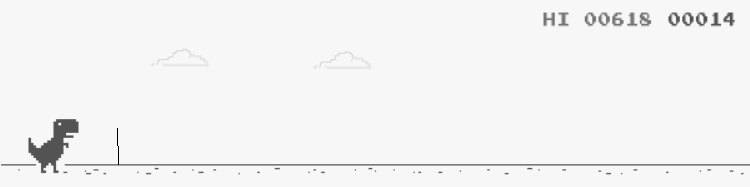

In [533]:
value = 40
img = canvas.screenshot_as_png

img = Image.open(BytesIO(img))

draw = ImageDraw.Draw(img) 
draw.line(( 77+value, 128, 78+value, 164 ), fill="black")
img

In [496]:
i = 6
cropped = img.crop(( 77+i, 128, 78+i, 164 ))
np.squeeze(cropped)[:,0]

array([247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247,
       247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247,
       247, 247, 247, 247, 247, 247, 247, 247, 247, 247], dtype=uint8)

In [425]:
type(np.sum(restart_button))

numpy.uint32

In [432]:
img.show() 
np.sum(np.array(restart_button)) < 1000000

True

In [429]:
threshold = 9500
canvas = driver.find_element_by_css_selector('.runner-canvas')
driver.find_element_by_xpath("//html").send_keys(Keys.SPACE)
start = time.time()

incr = 1
x_top_left = 77
y_top_left  = 128
x_bottom_rigth = 128
y_bottom_rigth = 164

x_ref_top_left = 352
y_ref_top_left = 96
x_ref_bottom_rigth = 397
y_ref_bottom_rigth = 132

while True:
    img = canvas.screenshot_as_png
    img = Image.open(BytesIO(img))
    cropped = img.crop( ( x_top_left, y_top_left, x_bottom_rigth , y_bottom_rigth ) ) 
    restart_button = img.crop(( x_ref_top_left, y_ref_top_left, x_ref_bottom_rigth,
                               y_ref_bottom_rigth ))
    
    if np.sum(cropped) < 1700000:
        driver.find_element_by_xpath("//html").send_keys(Keys.SPACE)   
        
    if np.sum(restart_button) < 1000000:
        print('restart button!')
        break
        
    if time.time() - start > 100:
        print('updated')
        start = time.time()
        x,y = x+incr,y+incr 
        incr+=-1 

restart button!


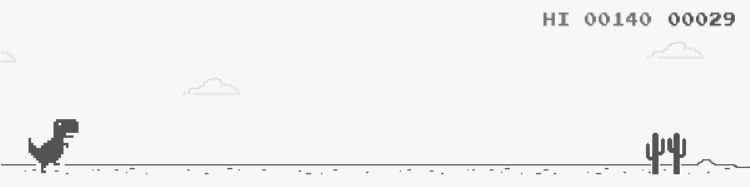

In [72]:
# np.array(img)


In [ ]:
img = Image.open(StringIO(base64.decodestring(driver.get_screenshot_as_base64())))